## 회귀(Regression)
- 데이터를 잘 설명하는 선 그리기
- 데이터를 잘 설명하는 오차가 가장 적은 선 그리기
- 데이터를 잘 설명하는 선의 기울기($W$)와 절편($b$) 찾기
- 회귀는 $y=f(x)$에서 입력($x$)과 출력($y$)이 실수일 때, 함수 $f(x)$를 예측하는 것

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/0*Yfz5JM6W3a36FLD8.png" width=600>

이미지출처: https://medium.datadriveninvestor.com/linear-regression-and-its-mathematical-implementation-29d520a75ede

### 선형 회귀(Linear Regression)의 기본식
$
\begin{aligned}
f(x) &= {Wx+b} \\
\end{aligned}
$

- $W$: 기울기 $\rightarrow$ 가중치(weight)
- $b$: 절편 $\rightarrow$ 편향(bias)

### 선형 회귀의 예
- 부모의 키와 자녀의 키의 관계
- 면적에 따른 주택의 가격
- 연령에 따른 실업율 예측
- 공부 시간과 학점 과의 관계
- CPU 속도와 프로그램 실행 시간 예측

#### [code] LinearRegression 모델 학습 예측

x= [1.5], y= [2.25]


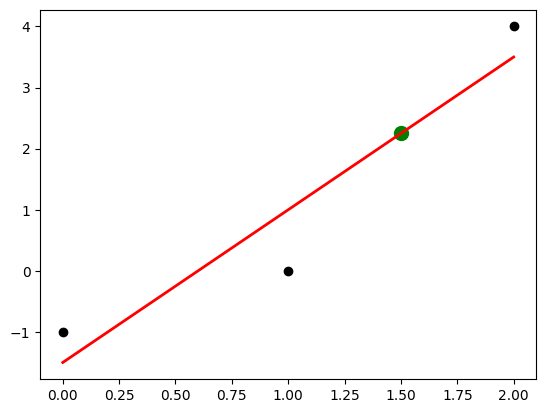

In [ ]:
import matplotlib.pylab as plt
from sklearn import linear_model

# 선형 회귀 모델을 생성한다.
reg = linear_model.LinearRegression()

# 데이터는 파이썬의 리스트로 만들어도 되고 아니면 넘파이의 배열로 만들어도 된다.
X = [[0], [1], [2]]		# 반드시 2차원으로 만들어야 한다.
y = [-1, 0, 4]

# 학습을 시킨다.
reg.fit(X, y)

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X)

# 학습 데이터와 y 값을 산포도로 그린다.
plt.scatter(X, y, color='black')

# 학습 데이터와 예측값으로 선그래프로 그린다.
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다.
plt.plot(X, y_pred, color='red', linewidth=2)

# 예측한다.
x_pred = 1.5
print("x= ["+str(x_pred)+"], y=", reg.predict([[x_pred]]))
plt.scatter([[x_pred]], reg.predict([[x_pred]]), color='green', s=100, marker = 'o')

plt.show()

## 손실함수 최소화하기

### 손실함수(Loss function):
- 지도학습(Supervised Learning)에서 알고리즘이 예측한 값과 실제 정답의 차이를 비교하기 위한 함수
- '학습 중에 알고리즘이 얼마나 잘못 예측하는 정도'를 확인하기 위한 함수
- 최적화(Optimization)를 위해 최소화하는 것이 목적인 함수
- 손실 함수를 목적 함수(Objective Function)라고도 함

$$
\begin{aligned}
Loss &= {1\over3} ((f(x_1)-y_1)^2+(f(x_2)-y_2)^2+(f(x_3)-y_3)^2)\\
Loss &= {1 \over n} \sum_{i=1}^{n} {(f(x_i)-y_i)^2} \\
Loss(W,b) &= {1 \over n} \sum_{i=1}^{n} {((Wx_i+b)-y_i)^2} \\
\end{aligned}
$$


평균제곱오차(MSE, Mean Squared Error)
- 오차(error)를 제곱한 값의 평균

<img src="https://www.jmp.com/en_se/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548351208631.png" width=600>

이미지출처: https://www.jmp.com/en_se/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model.html

$$
\begin{aligned}
Data&= [ (0, -1), (1, 0), (2, 4) ] \\
Loss&={1\over3} ((f(x_1)-y_1)^2+(f(x_2)-y_2)^2+(f(x_3)-y_3)^2)\\
    &={1\over3} ((f(0)-(-1))^2+(f(1)-0)^2+(f(2)-4)^2)\\
    &={1\over3} (((W\times0+b)-(-1))^2+((W\times1+b)-0)^2+((W\times2+b)-4)^2)\\
\end{aligned}
$$

#### [code] 직선 선택하기

선형모델 3 x+ -0.5 의 평균제곱오차 = 2.9166666666666665


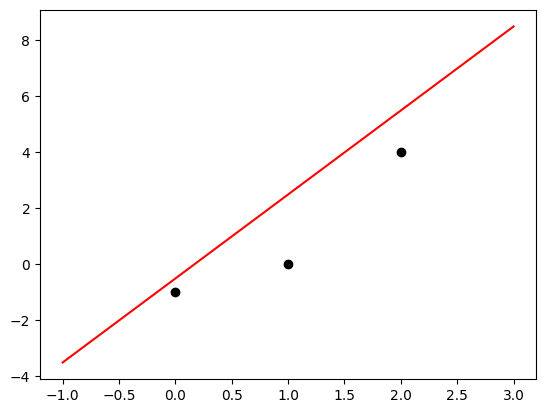

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 학습 데이터 생성
x = [0, 1, 2]
y = [-1, 0, 4]

# 파라미터 값 설정(임의의 값 저장)
W = 3
b = -0.5

# 선형회귀 함수
def f(x):
  return (W * x) + b

# 평균제곱오차(MSE, Mean Square Error)
def MSE(x, y):
  s = 0
  for i in range(0, len(y)):
    s = s + ((f(x[i]) - y[i]) ** 2)
  return s / (i + 1)
print('선형모델', W,'x+', b,'의 평균제곱오차 =', MSE(x, y))

# 입력값(x, y) - 특징 값(x, feature), 결과 값(y, label)는 점으로 표시
plt.scatter(x, y, color='black')
# 예측값(x, y') - 선형회귀 함수로 예측한 값(y')은 선으로 표시
plt.plot([min(x)-1, max(x)+1], [f(min(x)-1), f(max(x)+1)], color='red')
#plt.grid()
plt.show()

### '알고리즘을 학습한다'의 수학적 의미
$$
\begin{aligned}
{\tilde\theta} &= {\underset{\theta}{argmin}} Loss(x, y; \theta) \\
{\hat W, \hat b} &= {\underset{W, b}{argmin}} Loss(x, y; W, b) \\
\end{aligned}
$$

- $Loss$: 손실 함수
- $argmin$: arguments of minimum을 축약한 수학적 표현으로, 목적 함수(손실 함수, $L$)를 최소화하는 입력값을 찾는 역할
- $x$: 학습 데이터의 입력값으로, $x$로 얻어낸 예측값($\hat{y}$)은 정답($y$)과 비교
- $y$: 학습 데이터의 정답, 결과, 레이블
- $\theta$: 알고리즘 학습 시 사용되는 모든 파라미터의 벡터, $(W, b)$
- $\tilde\theta$: 추정된 최적의 파라미터, $(\hat W, \hat b)$

알고리즘을 학습하는 것은 알고리즘이 예측한 값($\hat{y}$)이 정답($y$)과 최대한 근접하게 만드는 과정

학습 데이터($x, y$)는 고정된 값이므로, 알고리즘 학습 시 사용되는 최적의 파라미터 $\tilde\theta$를 찾아 손실함수($Loss$)를 최소화하는 과정

즉, 손실함수($Loss$)를 최소로 하는 $\tilde\theta$($\hat W$, $\hat b$)를 찾기

**기계학습에서 모델을 학습시킨다는 것은 레이블이 있는 데이터로부터 올바른 가중치(W)와 바이어스 값(b)을 학습(결정)하는 것임**

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc5UBS6%2FbtrzN2JXAUh%2Fb2b1crrvrXKqZyyjbUJ6Rk%2Fimg.png" width=400>

이미지 출처: https://heytech.tistory.com/361

#### [code] 손실함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 손실함수 - 평균제곱오차(MSE, Mean Square Error)
def Loss(x, y, W, b):
  s = 0
  for i in range(0, len(y)):
    y_pred = (W * x[i]) + b
    s = s + ((y_pred - y[i]) ** 2)
  return s / (i + 1)

#### [code] Parameter값 변화에 따른 손실함수 값 변화

W= 2.5
Loss= 0.5


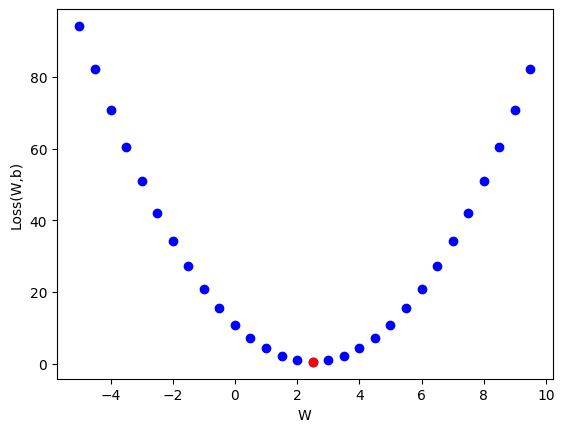

In [ ]:
# 학습 데이터 생성
x = [0, 1, 2]
y = [-1, 0, 4]

# 변화하는 파라미터(W) 값
W_values = np.arange(-5, 10, 0.5)
# 임의의 고정된 파라미터(b) 값
b = -1.5

# 파라미터(W) 값 변화에 따른 손실 함수(Loss) 값
Loss_values = []
for W in W_values:
  Loss_values.append(Loss(x, y, W, b))


# 손실 함수의 최저값 요소의 인덱스
Loss_argmin = np.argmin(Loss_values)
print('W=', W_values[Loss_argmin])
print('Loss=', Loss_values[Loss_argmin])

# 파라미터(W), 손실 함수(Loss) 그래프
plt.xlabel('W')
plt.ylabel('Loss(W,b)')
plt.scatter(W_values, Loss_values, color='blue')

# 최저값 파라미터(W), 손실 함수(Loss) 표시
plt.scatter(W_values[Loss_argmin], Loss_values[Loss_argmin], color='red')

plt.show()

### 기울기(gradient)가 0인 지점이 Loss가 최소인 지점임

기울기(gradient)
- 미분 가능한 N개의 다변수 함수 f를 각 축이 가리키는 방향마다 편미분한 것
- 편미분은 다변수 함수에서 관심이 있는 한 변수만 변수로 생각하고, 나머지 변수들은 상수로 취급한 뒤 미분하는 방법

### 주어진 데이터를 가장 잘 설명하는 함수 찾기

문제: 주어진 데이터를 가장 잘 설명하는 함수 찾기

1. 데이터: $Data = [ (0, -1), (1, 0), (2, 4) ]$

2. 모델 선택 : 선형 모델 $f(x; W, b) = Wx + b$

3. $f$가 주어진 데이터에 가장 잘 부합하는 parameter값($W,b$) 찾기
$$
\begin{aligned}
f(0; W, b) &\approx -1 \\
f(1; W, b) &\approx 0 \\
f(2; W, b) &\approx 4 \\
\end{aligned}
$$

- 손실함수 Loss(W, b)
  - https://mathsolver.microsoft.com/ko/solve-problem/@jhhv7chi
$$
\begin{aligned}
Loss(W, b)&= ((f(x_1)-y_1)^2+(f(x_2)-y_2)^2+(f(x_3)-y_3)^2)\\
    &= ((f(0)-(-1))^2+(f(1)-0)^2+(f(2)-4)^2)\\
    &= (((W\times0+b)-(-1))^2+((W\times1+b)-0)^2+((W\times2+b)-4)^2)\\
    &= 5W^2 + 6bW - 16W + 3b^2 - 6b + 17
\end{aligned}
$$


- 손실함수의 기울기(gradient)가 0인 parameter값 찾기
  - https://mathsolver.microsoft.com/ko/solve-problem/@c9d1yceg

$$
\begin{aligned}
{\partial Loss(W, b)}\over{\partial W} &= 0\\
{\partial Loss(W, b)}\over{\partial b} &= 0\\
\end{aligned}
$$
$$
\begin{aligned}
{\partial Loss(W, b)}\over{\partial W} &= 10W + 6b - 16\\
{\partial Loss(W, b)}\over{\partial b} &= 6W + 6b - 6\\
\end{aligned}
$$

$$
\begin{cases}
10W + 6b - 16 &= 0\\
6W + 6b - 6 &= 0\\
\end{cases}
\\
W=2.5\\
b=-1.5\\
$$



#### [code] 찾은 W, b 파라미터 값 적용한 선 그리기

선형모델 2.5 x+ -1.5 의 평균제곱오차 = 0.5


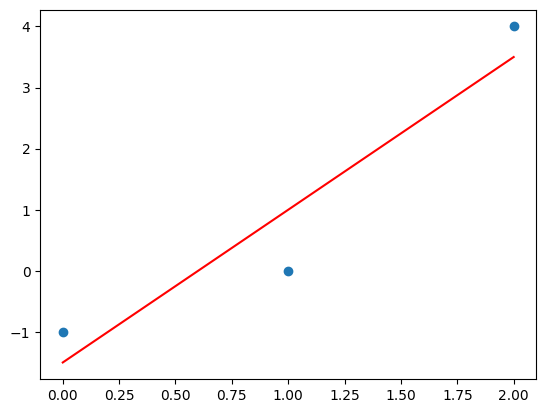

In [ ]:
# 학습 데이터 생성
x = [0, 1, 2]
y = [-1, 0, 4]

# Loss가 최소인 파라미터 값 설정
W = 2.5
b = -1.5

print('선형모델', W,'x+', b,'의 평균제곱오차 =', Loss(x, y, W, b))

# 입력값(x, y) - 특징 값(x, feature), 결과 값(y, label)는 점으로 표시
plt.scatter(x, y)
# 예측값(x, y') - 선형회귀 함수로 예측한 값(y')은 선으로 표시
plt.plot([min(x), max(x)], [f(min(x)), f(max(x))], color='red')
plt.show()

## 경사하강법(GD, Gradient Descent)
- 한 지점에서 출발해 최저값에 닿길 바라며 점점 이동해 가는 방법
- 함수의 기울기(경사)를 구하고 경사의 반대 방향으로 계속 이동시켜 극값에 이를 때까지 반복하여 최저값을 찾는 방법.
- 손실 함수가 어떠한 형태라도 적용가능함

<img src='https://blog.kakaocdn.net/dn/rXDcn/btrIuYYVC1u/IdVkBIjf39X8Xl6PBA0w40/img.gif'>

#### 기울기(경사, gradient)

<img src='https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F8be8be3f-bd7d-486c-986b-ab934cacd470%2F%25EC%258A%25A4%25ED%2581%25AC%25EB%25A6%25B0%25EC%2583%25B7_2022-08-17_%25EC%2598%25A4%25ED%259B%2584_8.39.19.png&blockId=27b7f80f-bdff-4f07-be71-4dcd6fd8fc8e' width=500>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FQyNLU%2FbtqUsdEUq74%2FpXLCoKOhp8ywMsIgauDuX1%2Fimg.jpg' width=500>

이미지 출처: https://questionet.tistory.com/17

#### Local minimum vs Global minimum
<img src='https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-16-gradient_descent/pic5.png' width=400>


#### 학습률(learning rate) $\eta$
  - 한 번에 기울기를 변경하는 양
  - 한번 움직일 때 얼마나 이동할 지 비율을 결정

<img src='https://blog.kakaocdn.net/dn/bHQiXB/btq6kFvVKu9/lkRTprJPlCGJ0YWw9jPp5K/img.png' width=400>

<img src='https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-16-gradient_descent/pic4.png' width=600>

#### 선형회귀에서 경사하강법
1. 초기화 한다.
  - $W$와 $b$를 임의의 초기값으로 설정
  - 학습률($lrate$, $\eta$)을 설정

2. 현재 손실함수에서 $W$의 기울기를 구함. 손실함수($Loss$)를 $W$에 대하여 미분
$
\begin{aligned}
{Loss(W, b)} &= {{1 \over n} {\sum_{i=1}^n ((W x_i+b)-y_i)^2}}
\\
{\partial Loss(W, b)}\over{\partial W}
  &= {1 \over n}{\sum_{i=1}^n 2((W x_i+b)-y_i)(x_i)}
  &= {2 \over n} {\sum_{i=1}^n x_i((W x_i+b)-y_i)} \\
\end{aligned}
$

3. 현재 손실함수에서 $b$의 기울기를 구함. 손실함수를 b에 대하여 미분
$
\begin{aligned}
{Loss(W, b)} &= {1 \over n} {\sum_{i=1}^n ((W x_i+b)-y_i)^2}
\\
{\partial Loss(W, b)}\over{\partial b}
  &= {2 \over n} {\sum_{i=1}^n ((W x_i+b)-y_i)} \\
\end{aligned}
$

4. 학습률($lrate$)만큼 파라미터 값($W, b$)을 업데이트
$
\begin{aligned}
{W^{t+1}} &= {W^{t}-lrate*{{\partial Loss(W, b)}\over{\partial W}}}\\
{b^{t+1}} &= {b^{t}-lrate*{{\partial Loss(W, b)}\over{\partial b}}}\\
\end{aligned}
$

#### [code] 경사하강법 - 수식 적용

학습 횟수: 0 가중치(W): 1.001 바이어스(b): 0.499
학습 횟수: 100 가중치(W): 1.0949321000443737 바이어스(b): 0.399391385592714
학습 횟수: 200 가중치(W): 1.1790105023838526 바이어스(b): 0.30177097659975893
학습 횟수: 300 가중치(W): 1.2555773911222183 바이어스(b): 0.2073330266811996
학습 횟수: 400 가중치(W): 1.3261604418495945 바이어스(b): 0.11671155941068263
학습 횟수: 500 가중치(W): 1.3917784842354306 바이어스(b): 0.030199219438196513
학습 횟수: 600 가중치(W): 1.453131125971798 바이어스(b): -0.05211743305938203
학습 횟수: 700 가중치(W): 1.5107164631517744 바이어스(b): -0.13027438538213976
학습 횟수: 800 가중치(W): 1.5649042190834537 바이어스(b): -0.20437868983643961
학습 횟수: 900 가중치(W): 1.615981254160136 바이어스(b): -0.2745768280886273
학습 횟수: 1000 가중치(W): 1.66417994557963 바이어스(b): -0.3410353588811155
학습 횟수: 1100 가중치(W): 1.7096959428684844 바이어스(b): -0.40392916332524015
학습 횟수: 1200 가중치(W): 1.7526993310448888 바이어스(b): -0.4634343850445652
학습 횟수: 1300 가중치(W): 1.7933417001787022 바이어스(b): -0.5197242672436049
학습 횟수: 1400 가중치(W): 1.8317606701365245 바이어스(b): -0.5729667733097261
학습 횟수: 1500 가중치(W): 1

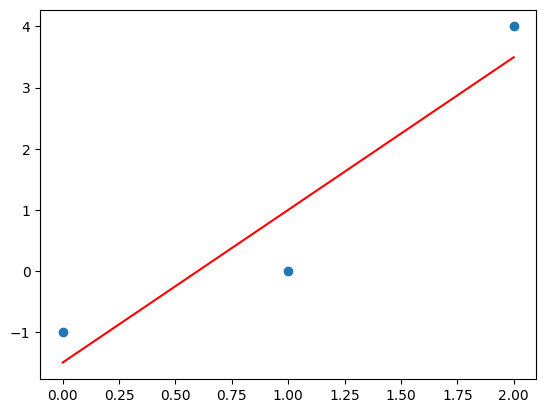

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
X = np.array([0, 1, 2])
y = np.array([-1, 0, 4])

# 초기값 설정
W = 1.0           # 기울기
b = 0.5           # 절편
lrate = 0.001     # 학습률: 한 번에 기울기를 변경하는 양
epochs = 10000    # 반복 횟수: 모든 학습 데이터셋을 학습하는 횟수
n = float(len(X)) # 입력 데이터의 개수

# 경사 하강: 오차가 최소일 때까지 파라미터값(W,b) 업데이트
for i in range(epochs):

  y_pred = W*X + b  	# 선형 회귀 예측값
  dW = (2/n) * sum(X * (y_pred-y)) 	# 현재 손실함수에서 W의 기울기 구하기
  db = (2/n) * sum(y_pred-y)  	# 현재 손실함수에서 b의 기울기 구하기
  W = W - lrate * dW  # 가중치(W) 업데이트
  b = b - lrate * db  # 바이어스(b) 업데이트

  if i % 100 == 0 :
      print('학습 횟수:', i, '가중치(W):', W, '바이어스(b):', b)

# 최종 파라미터 값 출력
print('학습 횟수:', i, '가중치(W):', W, '바이어스(b):', b)

# 예측값을 만든다.
y_pred = W * X + b

# 입력 데이터를 그래프 상에 찍는다.
plt.scatter(X, y)

# 예측값은 선그래프로 그린다.
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

## 예제

#### [code] 경사하강법으로 구현 - 인간의 키(x)와 몸무게(y)
- 안준혁 homework answer

학습 횟수: 0 가중치(W): 2.5259560000000003 바이어스(b): -49.0192
학습 횟수: 100 가중치(W): 22.553072285507863 바이어스(b): -34.997948371055436
학습 횟수: 200 가중치(W): 21.98589076969333 바이어스(b): -34.06778544681553
학습 횟수: 300 가중치(W): 21.418321555444383 바이어스(b): -33.172453637390255
학습 횟수: 400 가중치(W): 20.865960215005813 바이어스(b): -32.30113884031109
학습 횟수: 500 가중치(W): 20.328411051887887 바이어스(b): -31.453189329418038
학습 횟수: 600 가중치(W): 19.805276870423977 바이어스(b): -30.62797853247045
학습 횟수: 700 가중치(W): 19.29617111677582 바이어스(b): -29.824896685432776
학습 횟수: 800 가중치(W): 18.8007176029711 바이어스(b): -29.04335037577824
학습 횟수: 900 가중치(W): 18.318550228938456 바이어스(b): -28.28276210400032
학습 횟수: 1000 가중치(W): 17.849312711989153 바이어스(b): -27.542569856887244
학습 횟수: 1100 가중치(W): 17.392658323552965 바이어스(b): -26.822226692239674
학습 횟수: 1200 가중치(W): 16.94824963297388 바이어스(b): -26.121200334724765
학습 횟수: 1300 가중치(W): 16.515758258176085 바이어스(b): -25.438972782567664
학습 횟수: 1400 가중치(W): 16.094864623016168 바이어스(b): -24.77503992479007
학습 횟수: 1500 가중

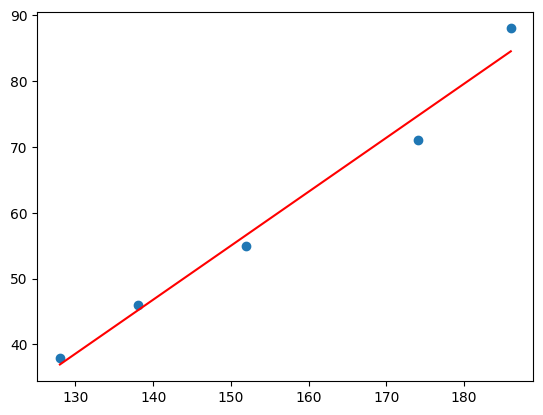

In [2]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import linear_model

# data -> 계산과정에서의 오버플로우 방지 위해 100으로 나누고 계산
X = np.array([174,152,138,128,186])/100
y = np.array([71,55,46,38,88])/100

# 초기값 설정
W = 1           # 기울기
b = -50           # 절편
lrate = 0.01    # 학습률: 한 번에 기울기를 변경하는 양
epochs = 100000   # 반복 횟수: 모든 학습 데이터셋을 학습하는 횟수
n = float(len(X)) # 입력 데이터의 개수

# 경사 하강: 오차가 최소일 때까지 파라미터값(W,b) 업데이트
for i in range(epochs):

  # 선형 회귀 예측값
  y_pred = W*X+b

  # 현재 손실함수에서 W의 기울기 구하기
  dW = (2/n) * sum(X * (y_pred-y))

  # 현재 손실함수에서 b의 기울기 구하기
  db = (2/n) * sum(y_pred-y)

  # 가중치(W) 업데이트
  W = W - lrate * dW
  # 바이어스(b) 업데이트
  b = b - lrate * db

  if i % 100 == 0 :
      print('학습 횟수:', i, '가중치(W):', W, '바이어스(b):', b)

# 최종 파라미터 값 출력
print('학습 횟수:', i, '가중치(W):', W, '바이어스(b):', b)

# 예측값을 만든다.
y_pred = 100 * W * X + 100 * b

# 입력 데이터를 그래프 상에 찍는다.
X *= 100
y *= 100
plt.scatter(X, y)

# 예측값은 선그래프로 그린다.
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

#### [code] sklearn LinearRegression 예측 - 인간의 키(x)와 몸무게(y)

가중치(기울기 파라미터 W) : [0.82021132]
편향(절편 파라미터 b) : -68.0248807089298
예측 : x= [165], y= [67.30998637]


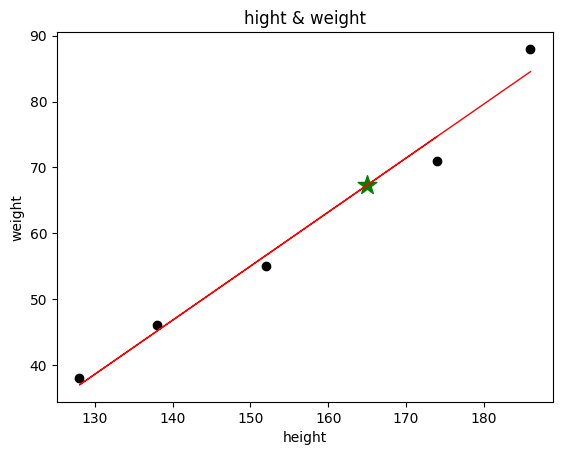

In [ ]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]
reg.fit(X, y)			# 학습

print("가중치(기울기 파라미터 W) :", reg.coef_)
print("편향(절편 파라미터 b) :", reg.intercept_)

# 학습 데이터와 y 값 - 점 그래프
plt.scatter(X, y, color='black')
# 학습 데이터를 입력으로 하여 예측값을 계산
y_pred = reg.predict(X)
# 학습 데이터와 예측값 - 선 그래프
# 계산된 기울기와 y 절편을 가지는 직선
plt.plot(X, y_pred, color='red', linewidth=1)
plt.title('hight & weight')
plt.xlabel('height')
plt.ylabel('weight')

# 예측
x_pred = 165
print("예측 : x= ["+str(x_pred)+"], y=", reg.predict([[x_pred]]))
plt.scatter([[x_pred]], reg.predict([[x_pred]]), color='green', s=200, marker = '*')

plt.show()

#### [code] sklearn LinearRegression 예측 - 당뇨병 환자 데이터

가중치(기울기 파라미터 W) : [[976.10822731]]
편향(절편 파라미터 b) : [151.55092419]
R2 Score: 0.35
예측 : x= [0.05], y= [[200.35633556]]


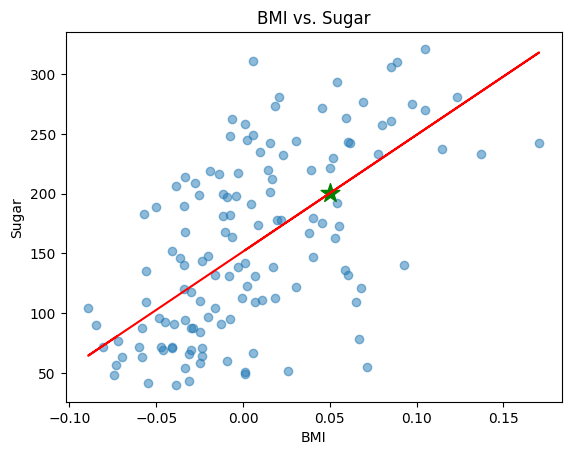

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 데이터셋 로드
diabetes = load_diabetes()

# BMI와 혈당 데이터 추출
X = diabetes.data[:, 2].reshape(-1, 1)
y = diabetes.target.reshape(-1, 1)

# 전체 데이터를 학습 데이터와 테스트 데이터를 (70:30) 비율로 분할함
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=seed, shuffle=False)

# 선형회귀 모델 학습
reg = LinearRegression()
reg.fit(X_train, y_train)

# 정확도를 계산함
y_pred = reg.predict(X_test)
scores = r2_score(y_test, y_pred)

print("가중치(기울기 파라미터 W) :", reg.coef_)
print("편향(절편 파라미터 b) :", reg.intercept_)
print("R2 Score: {:.2f}".format( scores ))

# 회귀선 그리기
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, y_pred, color='red')
plt.title('BMI vs. Sugar')
plt.xlabel('BMI')
plt.ylabel('Sugar')

# 예측
x_pred = 0.05
print("예측 : x= ["+str(x_pred)+"], y=", reg.predict([[x_pred]]))
plt.scatter([[x_pred]], reg.predict([[x_pred]]), color='green', s=200, marker = '*')

plt.show()

#### [code] 선형 회귀: 당뇨병 환자 데이터

가중치(기울기 파라미터 W) : [[976.10822731]]
편향(절편 파라미터 b) : [151.55092419]


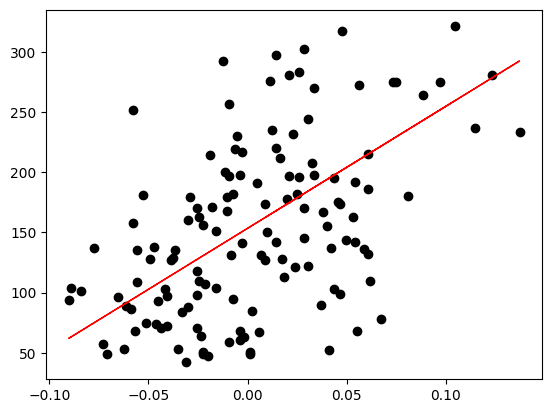

In [ ]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# 당뇨병 데이터 세트를 적재함
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# X는 하나의 특징(BMI)
diabetes_X_new = diabetes_X[:, np.newaxis, 2]

# 학습 데이터와 테스트 데이터를 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.3, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print("가중치(기울기 파라미터 W) :", reg.coef_)
print("편향(절편 파라미터 b) :", reg.intercept_)


# 테스트 데이터로 예측
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()